In [1]:
import torch

In [15]:
orz = torch.rand(3, 5)
print(orz)
print(orz[1])
print(orz[1] ** 5)

tensor([[0.8508, 0.5553, 0.3821, 0.0810, 0.1335],
        [0.7168, 0.6579, 0.9628, 0.1862, 0.4992],
        [0.2169, 0.9496, 0.6143, 0.6141, 0.6076]])
tensor([0.7168, 0.6579, 0.9628, 0.1862, 0.4992])
tensor([1.8925e-01, 1.2326e-01, 8.2734e-01, 2.2409e-04, 3.0993e-02])


In [16]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [17]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [18]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0624, -0.0094,  0.0970,  0.0562, -0.0437, -0.0166, -0.0271, -0.0637,
          0.0494,  0.0171]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [19]:
torch.manual_seed(1729)

In [20]:
x = torch.randn(1, 10)

In [21]:
print(x)

tensor([[-1.1257, -0.0057, -1.3975,  1.4364, -0.1068, -0.8413,  0.7753, -0.5475,
          1.2442, -0.1366]])


In [22]:
prev_h = torch.randn(1, 20)

In [23]:
print(prev_h)

tensor([[-0.4636, -0.4589,  1.5013, -0.2707,  0.5898, -1.0872, -0.2940, -0.7889,
         -0.1804, -0.5438, -0.1018,  0.3261,  1.9147, -0.5373, -1.4944,  0.5240,
         -1.4364, -0.5617, -1.1327,  0.0796]])


In [24]:
W_h = torch.randn(20, 20)

In [25]:
print(W_h)

tensor([[ 0.3449,  0.6962, -0.2622, -0.7324, -1.5412,  1.7046, -0.3845,  0.3328,
         -0.6018, -1.0326,  0.9224,  0.6983,  0.4298,  0.7367, -0.6765, -1.6013,
         -0.4333,  0.0672,  1.1396,  0.8319],
        [-2.8290,  0.7990, -0.0259, -0.1426,  0.3132, -0.0052,  0.2564,  0.5316,
          0.9480, -0.8093,  1.6049, -0.3759,  1.6718, -1.7147,  0.7230, -1.0887,
         -1.8443,  0.9148, -1.3802, -2.2965],
        [ 0.1192, -0.1975, -0.0881, -1.5910,  1.1006,  0.4278,  0.3104,  0.7605,
         -1.2862,  2.3782,  0.1931, -0.7604, -0.3729, -0.3506,  0.6184, -0.8416,
         -0.5616,  0.0978, -1.1480,  1.0007],
        [-1.1884, -0.7783, -0.2389,  0.2970, -1.5321, -0.6058, -1.2782,  0.4728,
         -0.4541,  0.4006,  0.3103, -0.8570, -1.7144,  1.2718,  0.5791,  1.0235,
         -1.2904, -1.0635,  1.2939,  0.6420],
        [-0.6757,  0.1376, -0.4425, -0.0483, -1.5344,  0.4059,  0.6875,  0.8909,
         -0.5431,  1.4094, -1.8051, -0.7836,  0.5342, -0.5598,  0.8304, -0.4330,
      

In [26]:
W_x = torch.randn(20, 10)

In [27]:
print(W_x)

tensor([[ 2.3934e+00, -3.4110e-01, -1.4382e+00,  1.2331e+00, -9.7630e-02,
         -2.8418e-01, -2.8721e-01,  1.1003e+00,  1.0374e+00,  2.1710e-01],
        [-4.6288e-01, -2.4551e-01, -7.5455e-01, -1.2574e+00,  2.2531e-01,
          3.2977e-01, -2.3607e+00,  4.5326e-01,  1.1335e+00,  1.3151e-01],
        [ 1.0117e+00,  5.1343e-01,  1.5889e+00, -2.0537e-01,  5.2540e-01,
          1.1568e+00,  7.7021e-01,  5.0064e-02,  1.4679e+00,  2.6712e-01],
        [ 8.2550e-01, -1.5017e-01,  1.8853e-01,  6.0882e-01, -2.6476e-01,
         -6.7771e-01,  1.5736e+00,  4.5240e-01,  3.7509e-01,  2.8655e-01],
        [ 4.8541e-01, -1.3093e+00, -1.0888e+00,  2.7921e+00,  9.8802e-01,
         -5.3969e-01,  7.1255e-01, -1.3497e+00,  5.3468e-01, -3.1235e-01],
        [-5.1749e-04, -3.5624e-01, -6.3068e-01, -1.0360e+00,  5.3676e-01,
          4.2574e-01,  7.9390e-01,  3.3186e-01,  1.4483e+00,  4.4602e-01],
        [-1.5044e-01, -1.2368e+00, -1.1558e+00, -3.0528e-01,  9.8272e-01,
          4.0460e-01, -6.7378e-0

In [28]:
i2h = torch.mm(W_x, x.t())

In [29]:
h2h = torch.mm(W_h, prev_h.t())

In [30]:
next_h = i2h+h2h

In [31]:
next_h = next_h.tanh()

In [32]:
h2h.shape

torch.Size([20, 1])

In [33]:
i2h.shape

torch.Size([20, 1])

In [34]:
loss = next_h.sum()

In [35]:
loss

tensor(-2.5845)

In [36]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [37]:
F

<module 'torch.nn.functional' from 'C:\\Users\\vince\\AppData\\Roaming\\Python\\Python311\\site-packages\\torch\\nn\\functional.py'>

In [38]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [39]:
net = LeNet()

In [40]:
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [41]:
net.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [42]:
filters = torch.randn(8, 4, 3, 3)

In [43]:
filters

tensor([[[[-2.7939e-01,  1.1210e+00, -4.9333e-01],
          [-1.3254e+00,  7.8855e-01, -2.0221e+00],
          [ 5.8965e-01, -1.8399e+00, -4.6922e-01]],

         [[ 5.9846e-02,  1.2744e+00,  1.3943e+00],
          [-4.2417e-01,  3.4659e-01,  2.1147e-01],
          [-7.1755e-01, -1.1315e+00,  2.1533e-01]],

         [[-8.3253e-01, -3.9046e-01, -1.8886e-01],
          [-5.8440e-01, -1.8890e+00, -1.5860e-01],
          [ 9.3111e-01,  1.8836e+00, -9.5399e-01]],

         [[ 7.5382e-01,  9.4419e-01,  1.1362e+00],
          [ 4.6820e-01,  9.5190e-01, -5.9579e-01],
          [ 4.1594e-01, -1.3759e+00,  1.0790e+00]]],


        [[[ 4.4616e-01, -1.2363e+00,  1.7025e-01],
          [-7.8679e-01, -1.6657e+00,  3.8348e-01],
          [-3.2962e-01, -4.6644e-01,  5.1478e-01]],

         [[ 7.8638e-01, -7.5488e-02, -7.0654e-01],
          [-1.8872e+00, -3.5692e-01, -1.4451e+00],
          [ 8.5055e-01, -1.9754e+00, -7.2608e-01]],

         [[ 2.6702e+00, -1.2743e+00,  2.2901e-01],
          [ 5.915

In [44]:
inputs = torch.randn(1, 4, 5, 5)

In [45]:
F.conv2d(inputs, filters, padding=1)

tensor([[[[  6.1111,  -4.2767,  -5.7457,   0.5115,   4.3099],
          [ -1.0470,   3.5101,   2.2150,   3.2050, -12.0533],
          [ -1.0352,  19.6281,  -1.7912,   0.0626,  -0.6121],
          [  8.9096,   5.1375,   5.6179,  -4.1295,   4.5121],
          [  1.7254,  -0.6964,  10.3680,   5.2422,  -1.7886]],

         [[ -5.1343, -10.4448,  -1.5885,  -1.4133,   3.8210],
          [ -2.3841, -16.5861,  -2.4003,  -3.2805,  -1.8252],
          [ -3.3113,   8.3457,  -0.2644,   5.5710,  -6.0940],
          [  5.8794,   3.7659,  -5.9518,  -2.6017,   3.7631],
          [  8.2765,   3.1774,   0.3278,  -6.9519,   5.7087]],

         [[ -0.8971,  -8.5262,   1.8626,   5.7733,  -0.0356],
          [ -1.9430,   5.0611,  -2.8845,   6.9445, -11.7910],
          [ -3.9630,   4.5160,   2.9332,   0.9558,   6.4843],
          [ -0.2009,   2.8854,  -0.2294,  -2.3820,   8.0870],
          [  4.2749,  -2.3008,   6.8000,   1.6439,  -3.3029]],

         [[  1.6746,   3.8615,  -4.0178,   5.3526,  -8.1931],
  

In [46]:
filters = torch.randn(2, 2)

In [47]:
filters

tensor([[ 1.0127,  0.7546],
        [-0.3922, -1.1310]])

In [48]:
inputs = torch.randn(4, 3)

In [49]:
inputs

tensor([[ 0.6320,  1.1936, -0.4661],
        [ 0.0559, -1.1309,  1.3115],
        [ 1.0748, -2.1432,  1.7882],
        [ 1.1084, -0.9052, -0.2836]])

In [50]:
F.conv2d(inputs, filters)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [4, 3]

In [86]:
temp = nn.Conv2d(4, 1000, 14)

In [87]:
temp(torch.randn(4, 29+14, 53+14)).shape

torch.Size([1000, 30, 54])

In [88]:
input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)


Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0103,  0.0929,  0.1042,  0.0222, -0.0098, -0.0363,  0.0322, -0.0232,
         -0.0596, -0.1184]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [91]:
temp = net.forward(torch.rand(1, 1, 32, 32))

In [93]:
%matplotlib inline

In [94]:
import torchvision.transforms as transforms

In [95]:
tsf = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0, 0, 0), (0.5, 0.5, 0.5))])

In [96]:
import torchvision

In [97]:
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=False, transform=tsf)

In [98]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0, 0, 0), std=(0.5, 0.5, 0.5))
           )

In [99]:
import torch.optim as optim

In [100]:
import numpy as np

In [101]:
import matplotlib as plt

In [102]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [104]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

In [105]:
dataiter = iter(trainloader)

In [108]:
images, labels = next(dataiter)

In [107]:
dataiter

In [109]:
imshow(torchvision.utils.make_grid(images))

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [110]:
import matplotlib.pyplot as plt

In [117]:
def imshow(img):
    img = img / 2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

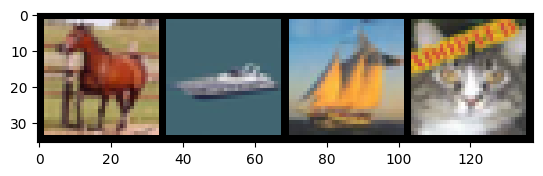

In [118]:
imshow(torchvision.utils.make_grid(images))

In [122]:
[classes[labels[i]] for i in range(4)]

['horse', 'ship', 'ship', 'cat']

In [120]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [123]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

NameError: name 'transform' is not defined

In [124]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=tsf)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=tsf)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [125]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [130]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.304
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.304
[2,  2000] loss: 2.303
[2,  4000] loss: 2.304
[2,  6000] loss: 2.303
[2,  8000] loss: 2.302
[2, 10000] loss: 2.304
[2, 12000] loss: 2.304
[3,  2000] loss: 2.304
[3,  4000] loss: 2.303
[3,  6000] loss: 2.304
[3,  8000] loss: 2.304
[3, 10000] loss: 2.303
[3, 12000] loss: 2.303
Finished Training


In [131]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [132]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [133]:
net = Net()


In [134]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [135]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [136]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [137]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.220
[1,  4000] loss: 1.971
[1,  6000] loss: 1.830
[1,  8000] loss: 1.731
[1, 10000] loss: 1.624
[1, 12000] loss: 1.600
[2,  2000] loss: 1.519
[2,  4000] loss: 1.517
[2,  6000] loss: 1.482
[2,  8000] loss: 1.484
[2, 10000] loss: 1.475
[2, 12000] loss: 1.426
Finished Training


In [138]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


In [139]:
rand = torch.rand(2, 4)

In [140]:
doubled = rand * (torch.ones(4) * 2)

In [141]:
doubled

tensor([[1.0291, 0.8526, 0.0462, 1.1287],
        [1.3482, 1.2176, 1.4183, 0.3818]])

In [142]:
    if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

IndentationError: expected an indented block after 'if' statement on line 1 (537574416.py, line 2)

In [143]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

We have a GPU!


In [144]:
model = nn.Sequential(
    nn.Linear(5, 128),  # Input size 64, output size 128
    nn.ReLU(),          # ReLU activation function
    nn.Linear(128, 64),  # Input size 128, output size 64
    nn.ReLU(),          # ReLU activation function
    nn.Linear(64, 2)    # Input size 64, output size 10
)

In [145]:
sample = torch.tensor([0.5, -0.5, 1.1, 0.3, 1.3])

In [146]:
def calc(sample):
    dist = (sample[2]-sample[0])**2 + (sample[3] - sample[1])**2
    return torch.tensor([dist, 1 if dist < sample[4] else 0])

In [147]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [148]:
learning_rate = 0.1

In [149]:
model(sample)

tensor([0.1181, 0.0073], grad_fn=<ViewBackward0>)

In [150]:
loss = loss_fn(model(sample), calc(sample))

In [151]:
loss

tensor(1.7633, grad_fn=<MseLossBackward0>)

In [152]:
calc(sample)

tensor([1., 1.])

In [153]:
model.zero_grad()

In [154]:
loss.backward()

In [155]:
model(sample)

tensor([0.1181, 0.0073], grad_fn=<ViewBackward0>)

In [156]:
with torch.no_grad():
    for param in model.parameters():
        param -= learning_rate * param.grad

In [157]:
model(sample)

tensor([0.8659, 0.7501], grad_fn=<ViewBackward0>)

In [158]:
learning_rate = 0.01

In [159]:
sample = torch.tensor([0.5, -1.2, -0.3, 0.2, 0.7])

In [160]:
calc(sample)

tensor([2.6000, 0.0000])

In [161]:
def calc(sample):
    dist = ((sample[2]-sample[0])**2 + (sample[3] - sample[1])**2)**0.5
    return torch.tensor([dist, 1 if dist < sample[4] else 0])

In [162]:
sample = torch.tensor([0.5, -1.2, -0.3, 0.2, 0.7])

In [163]:
calc(sample)

tensor([1.6125, 0.0000])

In [164]:
sample = torch.tensor([0.5, -1.2, -0.3, 0.2, 1.4])

In [165]:
sample = torch.tensor([0.5, -0.1, -0.3, 0.2, 1.4])

In [166]:
calc(sample)

tensor([0.8544, 1.0000])

In [167]:
loss = loss_fn(model(sample), calc(sample))

In [168]:
loss

tensor(0.2124, grad_fn=<MseLossBackward0>)

In [169]:
model(sample)

tensor([0.6552, 0.5844], grad_fn=<ViewBackward0>)

In [170]:
loss.backward()

In [171]:
with torch.no_grad():
    for param in model.parameters():
        param -= learning_rate * param.grad

In [172]:
model(sample)

tensor([0.7401, 0.6878], grad_fn=<ViewBackward0>)

In [173]:
param.grad

tensor([-2.1622, -2.8167])